<a href="https://colab.research.google.com/github/SimonT2003/MAT422/blob/main/HW_3_3_Unconstrained_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **More Calculus Concepts in Python**

## **3.3.1 - Necessary and Sufficient Conditions of Local Minimizers**

### **Definition 3.3.1 (Global minimizer)**

Let $f : \mathbb{R}^d\to\mathbb{R}$. The point $\textbf{x}^*\in\mathbb{ R}^d$
is a global minimizer of $f$ over $\mathbb{R}^d$ if
$$f(\textbf{x}) \geq f(\textbf{x}^*), \forall \textbf{x} \in \mathbb{ R}^d.$$

### **Definition 3.3.2 (Local minimizer)**

Let $f : \mathbb{R}^d\to\mathbb{R}$. The point $\textbf{x}^*\in\mathbb{ R}^d$
is a global minimizer of $f$ over $\mathbb{R}^d$ if there is $\delta >0$ such that
$$f(\textbf{x})\geq f(\textbf{x}^*), \forall \textbf{x}\in B_\delta(\textbf{x}^*)\backslash \{\textbf{x}^*\}.$$
If the inequality is strict, we say that $\textbf{x}^*$ is a strict local minimizer.

In [1]:
from scipy import optimize
import numpy as np

def f(x):
  return -np.exp(-(x - 0.7)**2)
result = optimize.minimize_scalar(f)
result.success # check if solver was successful
x_min = result.x
print(x_min)

0.6999999997839409


In [2]:
def f(x):   # The rosenbrock function
 return .5*(1 - x[0])**2 + (x[1] - x[0]**2)**2
 optimize.minimize(f, [2, -1], method="CG")

In [3]:
def jacobian(x):
  return np.array((-2*.5*(1 - x[0]) - 4*x[0]*(x[1] - x[0]**2), 2*(x[1] - x[0]**2)))
optimize.minimize(f, [2, 1], method="CG", jac=jacobian)

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 2.957865890641887e-14
       x: [ 1.000e+00  1.000e+00]
     nit: 8
     jac: [ 7.183e-07 -2.990e-07]
    nfev: 16
    njev: 16

### **Definition 3.3.3 (Descent Direction)**

Let $f : \mathbb{R}^d\to\mathbb{R}$. A vector \textbf{v} is a descent direction for $f$ at $\textbf{x}_0$ if there is $\alpha^*>0$ such that
$$f(\textbf{x}_0+\alpha \textbf{v})<f(\textbf{x}_0), \forall \alpha\in (0,\alpha^*).$$

### **Lemma 3.3.4 (Descent Direction and Directional Derivative)**

Let $f : \mathbb{R}^d\to\mathbb{R}$ be continuously differentiable at $\textbf{x}_0$. A vector $\textbf{v}$ is a descent direction for $f$ at
$\textbf{x}_0$ if
$$\frac{\partial f(\textbf{x}_0)}{\partial \textbf{v}}=\nabla f(\textbf{x}_0)^T\textbf{v}<0$$
that is, if the directional derivative of $f$ at $\textbf{x}_0$ in the direction $\textbf{v}$ is negative.

### **Lemma 3.3.5 (Existence of a Descent Direction)**

Let Let Let $f : \mathbb{R}^d\to\mathbb{R}$ be continuously differentiable at $\textbf{x}_0$ and assume that $\nabla f(\textbf{x}_0) \neq 0$. Then $f$ has a descent direction at $\textbf{x}_0$.

In [4]:
cur_x = 3 # The algorithm starts at x=3
rate = 0.01 # Learning rate
precision = 0.000001 #This tells us when to stop the algorithm
previous_step_size = 1 #
max_iters = 10000 # maximum number of iterations
iters = 0 #iteration counter
df = lambda x: 2*(x+5) #Gradient of our function

In [5]:
while previous_step_size > precision and iters < max_iters:
    prev_x = cur_x #Store current x value in prev_x
    cur_x = cur_x - rate * df(prev_x) #Grad descent
    previous_step_size = abs(cur_x - prev_x) #Change in x
    iters = iters+1 #iteration count
    #print("Iteration",iters,"\nX value is",cur_x) #Print iterations

print("The local minimum occurs at", cur_x)

The local minimum occurs at -4.9999518490318176


### **Theorem 3.3.6 (First-Order Necessary Condition)**

Let $f : \mathbb{R}^d\to\mathbb{R}$ be continuously differentiable on $\mathbb{R}^d$. If $\textbf{x}_0$ is a local minimizer, then $\nabla f(\textbf{x}_0) = 0$.

### **Definition 3.3.7**

A square symmetric $d \times d$ matrix $H$ is positive semi-definite
(PSD) if $\textbf{x}^TH\textbf{x}\geq 0$ for any $\textbf{x} \in \mathbb{R}^d$.

### **Theorem 3.3.8 (Second-Order Necessary Condition)**

Let  $f : \mathbb{R}^d\to\mathbb{R}$ be continuously differentiable on $\mathbb{R}^d$. If $\textbf{x}_0$ is a local minimizer, then $H_f(\textbf{x}_0)$ is PSD.

## **3.3.1.1 Suﬀicient conditions for Local Minimizers**

### **Theorem 3.3.10 (Second-Order Sufficient Condition)**


 $f : \mathbb{R}^d\to\mathbb{R}$ be twice
continuously differentiable on $\mathbb{R}^d$. If $\nabla f(\textbf{x}_0) = 0$ and $H_f(\textbf{x}_0)$ is positive definite, then $\textbf{x}_0$ is a strict local minimizer.

## **3.3.2 Convexity and Global Minimizers**

### **3.3.2.1 Convex Sets and functions**

   2
1 x - 2 x
Solution: x=1.000000


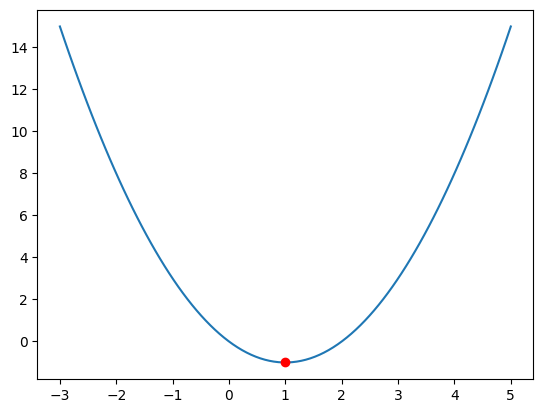

In [8]:
import numpy as np
import scipy.optimize as opt
objective = np.poly1d([1.0, -2.0, 0.0])
print(objective)
x0 = 3.0
results = opt.minimize(objective,x0)
print("Solution: x=%f" % results.x)
import matplotlib.pylab as plt
x = np.linspace(-3,5,100)
plt.plot(x,objective(x))
plt.plot(results.x,objective(results.x),'ro')
plt.show()

Optimization terminated successfully.
         Current function value: -1.000000
         Iterations: 2
         Function evaluations: 6
         Gradient evaluations: 3
Solution: x=1.000000


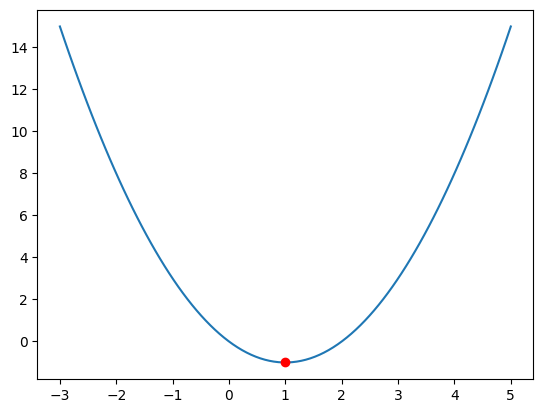

In [9]:
def objective(x,coeffs):
  return coeffs[0]*x**2 + coeffs[1]*x + coeffs[2]
x0 = 3.0
mycoeffs = [1.0,-2.0,0.0]
myoptions={'disp':True}
results = opt.minimize(objective,x0,args=mycoeffs,
options = myoptions)
print("Solution: x=%f" % results.x)
x = np.linspace(-3,5,100)
plt.plot(x,objective(x,mycoeffs))
plt.plot(results.x,objective(results.x,mycoeffs),'ro')
plt.show()

### **Definition 3.3.11 (Convex Set)**:


A set $D \subseteq\mathbb{ R}^d$ is convex if for all $\textbf{x},\textbf{y}\in D$ and
all $\alpha \in [0,1]$
$$(1-\alpha)\textbf{x}+\alpha\textbf{y}\in D.$$

### **Definition 3.3.13 (Convex Function)**

A function  $f : \mathbb{R}^d\to\mathbb{R}$  is convex if, for
all $\textbf{x},\textbf{y} \in \mathbb{R}^d$ and all $\alpha \in [0,1]$
$$f((1−\alpha)\textbf{x}+\alpha\textbf{y}) \leq (1−\alpha)f(\textbf{x}) +\alpha f(\textbf{y}).$$

### **Lemma 3.3.14 (Affine Functions are Convex)**

Let $\textbf{w} \in\mathbb{ R}^d$ and $b \in\mathbb{R}$. The function $f(\textbf{x}) = \textbf{w}^T \textbf{x}+b$ is convex.

### **Lemma 3.3.15 (First-Order Convexity Condition)**

Let $f : \mathbb{R}^d\to\mathbb{R}$ be continuously differentiable. Then $f$ is convex if and only if for all $\textbf{x},\textbf{y}\in\mathbb{ R}^d$
$$f(\textbf{y}) \geq f(\textbf{x}) +\nabla f(\textbf{x})^T(\textbf{y}−\textbf{x}).$$

### **Lemma 3.3.16 (Second-Order Convexity Condition)**

Let  $f : \mathbb{R}^d\to\mathbb{R}$ be twice continuously differentiable. Then $f$ is convex if and only if, for all $\textbf{x} \in\mathbb{ R}^d$, $\textbf{H}_f(\textbf{x})$ is PSD.

## **3.3.2.2 Global Minimizers of Convex Functions**


### **Theorem 3.3.18**

Let  $f : \mathbb{R}^d\to\mathbb{R}$ be a continuously differentiable, convex function. If $\nabla f(\textbf{x}_0) = 0$ then $\textbf{x}_0$ is a global minimizer.

### **Theorem 3.3.19 (Global Minimizers of Convex Functions)**

Let  $f : \mathbb{R}^d\to\mathbb{R}$ be a convex function. Then any local minimizer of $f$ is also a global minimizer.

In [11]:
def f(x):   # The rosenbrock function
  return .5*(1 - x[0])**2 + (x[1] - x[0]**2)**2
optimize.brute(f, ((-1, 2), (-1, 2)))

array([1.00001462, 1.00001547])

## **3.3.3 Gradient Descent**

## **3.3.3.1 Steepest Descent**

### **Lemma 3.3.22 (Steepest Descent)**

Let $f : \mathbb{R}^d\to\mathbb{R}$ be continuously differentiable at $\textbf{x}_0$. For any unit vector $\textbf{v}\in\mathbb{R}^d$,
$$\frac{\partial f(\textbf{x}_0)}{\partial \textbf{v}}\geq\frac{\partial f(\textbf{x}_0)}{\partial\textbf{v}^*}$$

### **Theorem 3.3.23**

Suppose that  $f : \mathbb{R}^d\to\mathbb{R}$ is twice continuously differentiable. The step size is chosen to minimize
$$\alpha_k = \arg \min_{\alpha >0}f(\textbf{x}^k −\alpha\nabla f(\textbf{x}^k
))$$
Then steepest descent started from any $\textbf{x}^0$ produces a sequence $\textbf{x}^k$, $k = 1,2,\cdots$ such that if $\nabla f(\textbf{x}^k)\neq 0$, then
$$f(\textbf{x}^{k+1}) \leq f(\textbf{x}^k), \forall k \geq 1$$

In [12]:
def f(x):   # The rosenbrock function
 return .5*(1 - x[0])**2 + (x[1] - x[0]**2)**2
optimize.minimize(f, [2, -1], method="CG")

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 1.6503729082243953e-11
       x: [ 1.000e+00  1.000e+00]
     nit: 13
     jac: [-6.153e-06  2.538e-07]
    nfev: 81
    njev: 27

## Source

madonnaojorin on Github